In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


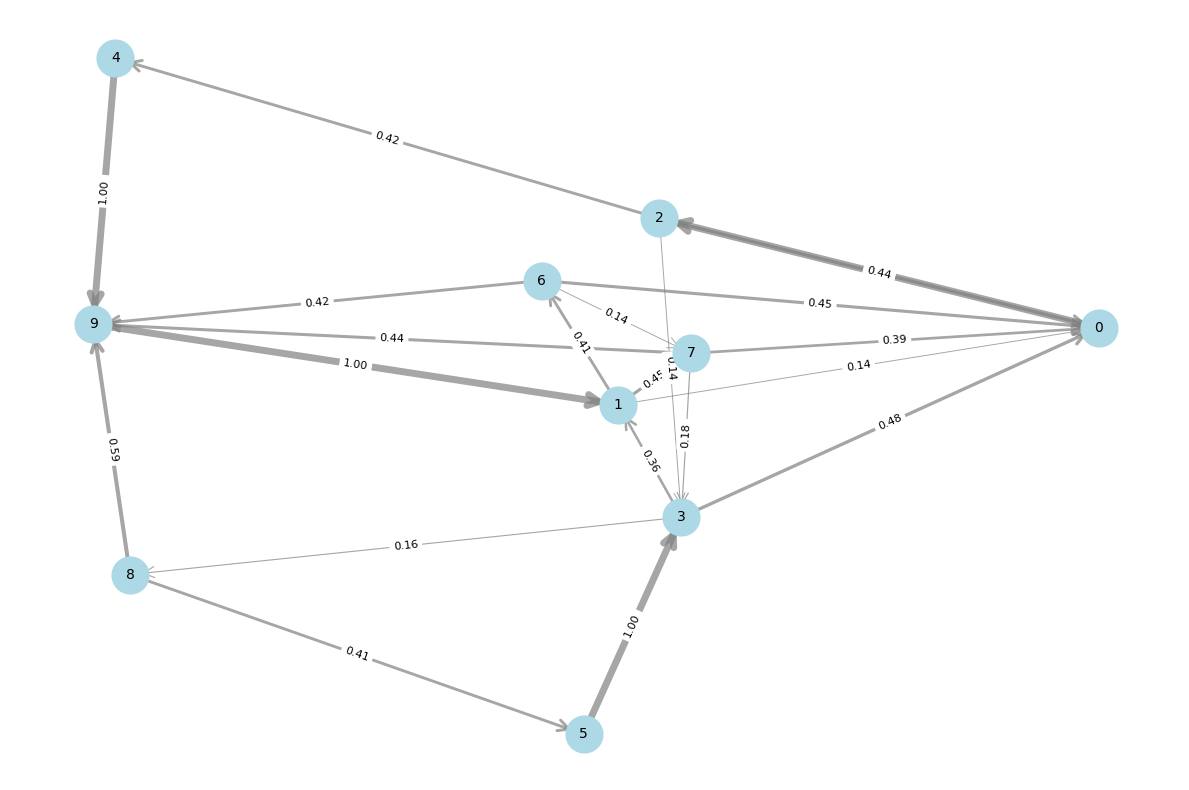

In [32]:
from graphverse.graph.graph_generation import (
    calculate_edge_density,
    generate_random_graph,
    load_graph,
    save_graph,
)
from graphverse.vis.graph_draw_nx import visualize_graph

G = load_graph("my_graph.gml")
visualize_graph(G)

In [33]:
from graphverse.graph.rules import instantiate_all_rules

In [146]:
import math
import random

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import torch

from graphverse.data.preparation import prepare_training_data
from graphverse.graph.graph_generation import (
    calculate_edge_density,
    generate_random_graph,
)
from graphverse.graph.rules import (
    AscenderRule,
    DescenderRule,
    EvenRule,
    OddRule,
    RepeaterRule,
    define_all_rules,
    instantiate_all_rules,
)
from graphverse.graph.walk import generate_multiple_walks
from graphverse.llm.evaluation import evaluate_model
from graphverse.llm.training import train_model

n = 10
num_walks = 100
min_walk_length = 5
max_walk_length = 20
num_repeaters = 3
repeater_min_steps = 3
repeater_max_steps = 10
epochs = 10
batch_size = 32
learning_rate = 0.001
verbose = False


if verbose:
    print("Selecting vertices with rules")
# ascenders, descenders, evens, odds, repeaters = define_all_rules(
#     n, num_repeaters, repeater_min_steps, repeater_max_steps
# )
# rules = (ascenders, descenders, evens, odds, repeaters)

rules = instantiate_all_rules(n, num_repeaters, repeater_min_steps, repeater_max_steps)

# Generate graph
if verbose:
    print("Generating graph")
G = generate_random_graph(n, rules, verbose=verbose)

if verbose:
    print(f"Graph created")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Is strongly connected: {nx.is_strongly_connected(G)}")
    print(f"Is weakly connected: {nx.is_weakly_connected(G)}")
    print(f"Now preparing training data")

# Prepare training data
walks = generate_multiple_walks(
    G, num_walks, min_walk_length, max_walk_length, rules, verbose=verbose
)
training_data, vocab = prepare_training_data(
    G, num_walks, min_walk_length, max_walk_length, rules, verbose=False
)
if verbose:
    print(f"Training data prepared")

# Train model
if verbose:
    print(f"Training model")
model = train_model(
    training_data, vocab, epochs, batch_size, learning_rate, verbose=verbose
)
if verbose:
    print(f"Model trained")

In [150]:
evaluate_model(
    model,
    G,
    vocab,
    num_walks=1,
    min_start_length=2,
    max_start_length=3,
    rules=rules,
    verbose=verbose,
)